## Prevent random disconnects

This cell runs JS code to automatic reconnect to runtime.

In [0]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


## Check GPU

*   Google Colab can provide you with one of Tesla graphics cards: K80, T4, P4 or P100
*   Here you can check the model of GPU before using DeepFaceLab



In [0]:
!nvidia-smi

## Manage workspace



*   You can import/export workspace or individual data, like model files with Google Drive
*   Also, you can use HFS (HTTP Fileserver) for directly import/export you workspace from your computer
*   You can clear all workspace or delete part of it



In [1]:
#@title Import from Drive

Mode = "workspace" #@param ["workspace", "data_src", "data_dst", "data_src aligned", "data_dst aligned", "models"]
Archive_name = "workspace.zip" #@param {type:"string"}

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def zip_and_copy(path, mode):
  unzip_cmd=" -q "+Archive_name
  
  %cd $path
  copy_cmd = "/content/drive/My\ Drive/Code/DFL/"+Archive_name+" "+path
  !cp $copy_cmd
  !unzip $unzip_cmd    
  !rm $Archive_name

if Mode == "workspace":
  zip_and_copy("/content", "workspace")
elif Mode == "data_src":
  zip_and_copy("/content/workspace", "data_src")
elif Mode == "data_dst":
  zip_and_copy("/content/workspace", "data_dst")
elif Mode == "data_src aligned":
  zip_and_copy("/content/workspace/data_src", "aligned")
elif Mode == "data_dst aligned":
  zip_and_copy("/content/workspace/data_dst", "aligned")
elif Mode == "models":
  zip_and_copy("/content/workspace", "model")
  
print("Done!")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content
Done!


In [0]:
!mv /content/drive/My\ Drive/aligned-Alek_Baldwin-4672.zip workspace/data_dst/aligned/

In [0]:
!cp -Rn /content/drive/My\ Drive/aligned workspace/data_src/

In [0]:
!ls -1 workspace/data_src/aligned/ | wc

   4130    4130   49560


In [0]:
#@title Export to Drive { form-width: "30%" }
Mode = "workspace" #@param ["workspace", "data_src", "data_dst", "data_src aligned", "data_dst aligned", "merged", "merged_mask", "models", "result video", "result_mask video"]
Archive_name = "workspace.zip" #@param {type:"string"}

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def zip_and_copy(path, mode):
  zip_cmd="-r -q "+Archive_name+" "
  
  %cd $path
  zip_cmd+=mode
  !zip $zip_cmd
  copy_cmd = " "+Archive_name+"  /content/drive/My\ Drive/Code/DFL/"
  !cp $copy_cmd
  !rm $Archive_name

if Mode == "workspace":
  zip_and_copy("/content", "workspace")
elif Mode == "data_src":
  zip_and_copy("/content/workspace", "data_src")
elif Mode == "data_dst":
  zip_and_copy("/content/workspace", "data_dst")
elif Mode == "data_src aligned":
  zip_and_copy("/content/workspace/data_src", "aligned")
elif Mode == "data_dst aligned":
  zip_and_copy("/content/workspace/data_dst", "aligned")
elif Mode == "merged":
  zip_and_copy("/content/workspace/data_dst", "merged")
elif Mode == "merged_mask":
  zip_and_copy("/content/workspace/data_dst", "merged_mask")
elif Mode == "models":
  zip_and_copy("/content/workspace", "model")
elif Mode == "result video":
  !cp /content/workspace/result.mp4 /content/drive/My\ Drive/
elif Mode == "result_mask video":
  !cp /content/workspace/result_mask.mp4 /content/drive/My\ Drive/
  
print("Done!")


Mounted at /content/drive
/content
Done!


In [0]:
#@title Import from URL{ form-width: "30%", display-mode: "form" }
URL = "https://github.com/iperov/DeepFaceLab/releases/download/pretrained/LIAE.f-128-80-48-16-1.000.000.zip" #@param {type:"string"}
Mode = "unzip to content/workspace/model" #@param ["unzip to content", "unzip to content/workspace", "unzip to content/workspace/data_src", "unzip to content/workspace/data_src/aligned", "unzip to content/workspace/data_dst", "unzip to content/workspace/data_dst/aligned", "unzip to content/workspace/model", "download to content/workspace"]

import urllib
from pathlib import Path

def unzip(zip_path, dest_path):

    
  unzip_cmd = " unzip -q " + zip_path + " -d "+dest_path
  !$unzip_cmd  
  rm_cmd = "rm "+dest_path + url_path.name
  !$rm_cmd
  print("Unziped!")
  

if Mode == "unzip to content":
  dest_path = "/content/"
elif Mode == "unzip to content/workspace":
  dest_path = "/content/workspace/"
elif Mode == "unzip to content/workspace/data_src":
  dest_path = "/content/workspace/data_src/"
elif Mode == "unzip to content/workspace/data_src/aligned":
  dest_path = "/content/workspace/data_src/aligned/"
elif Mode == "unzip to content/workspace/data_dst":
  dest_path = "/content/workspace/data_dst/"
elif Mode == "unzip to content/workspace/data_dst/aligned":
  dest_path = "/content/workspace/data_dst/aligned/"
elif Mode == "unzip to content/workspace/model":
  dest_path = "/content/workspace/model/"
elif Mode == "download to content/workspace":
  dest_path = "/content/workspace/"

if not Path("/content/workspace").exists():
  cmd = "mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model"
  !$cmd

url_path = Path(URL)
urllib.request.urlretrieve ( URL, dest_path + url_path.name )

if (url_path.suffix == ".zip") and (Mode!="download to content/workspace"):
  unzip(dest_path + url_path.name, dest_path)

  
print("Done!")

Unziped!
Done!


In [0]:
#@title Export to URL
URL = "http://" #@param {type:"string"}
Mode = "upload workspace" #@param ["upload workspace", "upload data_src", "upload data_dst", "upload data_src aligned", "upload data_dst aligned", "upload merged", "upload model", "upload result video"]

cmd_zip = "zip -r -q "

def run_cmd(zip_path, curl_url):
  cmd_zip = "zip -r -q "+zip_path
  cmd_curl = "curl --silent -F "+curl_url+" -D out.txt > /dev/null"
  !$cmd_zip
  !$cmd_curl


if Mode == "upload workspace":
  %cd "/content"
  run_cmd("workspace.zip workspace/","'data=@/content/workspace.zip' "+URL)
elif Mode == "upload data_src":
  %cd "/content/workspace"
  run_cmd("data_src.zip data_src/", "'data=@/content/workspace/data_src.zip' "+URL)
elif Mode == "upload data_dst":
  %cd "/content/workspace"
  run_cmd("data_dst.zip data_dst/", "'data=@/content/workspace/data_dst.zip' "+URL)
elif Mode == "upload data_src aligned":
  %cd "/content/workspace"
  run_cmd("data_src_aligned.zip data_src/aligned", "'data=@/content/workspace/data_src_aligned.zip' "+URL )
elif Mode == "upload data_dst aligned":
  %cd "/content/workspace"
  run_cmd("data_dst_aligned.zip data_dst/aligned/", "'data=@/content/workspace/data_dst_aligned.zip' "+URL)
elif Mode == "upload merged":
  %cd "/content/workspace/data_dst"
  run_cmd("merged.zip merged/","'data=@/content/workspace/data_dst/merged.zip' "+URL )
elif Mode == "upload model":
  %cd "/content/workspace"
  run_cmd("model.zip model/", "'data=@/content/workspace/model.zip' "+URL)
elif Mode == "upload result video":
  %cd "/content/workspace"
  run_cmd("result.zip result.mp4", "'data=@/content/workspace/result.zip' "+URL)
  
  
!rm *.zip

%cd "/content"
print("Done!")

In [0]:
#@title Delete and recreate
Mode = "Delete and recreate workspace" #@param ["Delete and recreate workspace", "Delete models", "Delete data_src", "Delete data_src aligned", "Delete data_src video", "Delete data_dst", "Delete data_dst aligned", "Delete merged frames"]

%cd "/content" 

if Mode == "Delete and recreate workspace":
  cmd = "rm -r /content/workspace ; mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model"  
elif Mode == "Delete models":
  cmd = "rm -r /content/workspace/model/*"
elif Mode == "Delete data_src":
  cmd = "rm /content/workspace/data_src/*.png || rm -r /content/workspace/data_src/*.jpg"
elif Mode == "Delete data_src aligned":
  cmd = "rm -r /content/workspace/data_src/aligned/*"
elif Mode == "Delete data_src video":
  cmd = "rm -r /content/workspace/data_src.*"
elif Mode == "Delete data_dst":
  cmd = "rm /content/workspace/data_dst/*.png || rm /content/workspace/data_dst/*.jpg"
elif Mode == "Delete data_dst aligned":
  cmd = "rm -r /content/workspace/data_dst/aligned/*"
elif Mode == "Delete merged frames":
  cmd = "rm -r /content/workspace/data_dst/merged; rm -r /content/workspace/data_dst/merged_mask"
  
!$cmd
print("Done!")

## Install or update DeepFaceLab

* Install or update DeepFAceLab directly from Github
* Requirements install is automatically
* Automatically sets timer to prevent random disconnects

In [2]:
GDRIVE_PROJ= "/content/drive/My Drive/Code/DFL/"
%cd "{GDRIVE_PROJ}"
PAT = !cat PAT
GIT_TOKEN = PAT[0]
GIT_USER = "doph"
GIT_REPO = "DeepFaceLab"

GIT_PATH="https://" + GIT_TOKEN + "@github.com/" + GIT_USER + "/" + GIT_REPO + ".git"

/content/drive/My Drive/Code/DFL


In [10]:
#@title Install or update DeepFaceLab from Github

Mode = "install" #@param ["install", "update"]

from pathlib import Path

%cd "{GRDIVE_PROJ}"

if (Mode == "install"):
  !git clone "{GIT_PATH}"

  # fix linux warning
  # /usr/lib/python3.6/multiprocessing/semaphore_tracker.py:143: UserWarning: semaphore_tracker: There appear to be 1 leaked semaphores to clean up at shutdown
  fin = open("/usr/lib/python3.6/multiprocessing/semaphore_tracker.py", "rt")
  data = fin.read()
  data = data.replace('if cache:', 'if False:')
  fin.close()

  fin = open("/usr/lib/python3.6/multiprocessing/semaphore_tracker.py", "wt")
  fin.write(data)
  fin.close()
  !pip install -r DeepFaceLab/requirements-colab.txt
else:
  %cd "{GIT_REPO}"
  !git pull
  !pip install -r requirements-colab.txt


!pip install --upgrade scikit-image
!apt-get install cuda-10-0

'''
if not Path("/content/pretrain").exists():
  print("Downloading CelebA faceset ... ")
  !wget -q --no-check-certificate -r 'https://github.com/chervonij/DFL-Colab/releases/download/pretrain-CelebA/pretrain_CelebA.zip' -O /content/pretrain_CelebA.zip
  !mkdir /content/pretrain
  !unzip -q /content/pretrain_CelebA.zip -d /content/pretrain/
  !rm /content/pretrain_CelebA.zip

if not Path("/content/pretrain_Q96").exists():
  print("Downloading Q96 pretrained model ...")
  !wget -q --no-check-certificate -r 'https://github.com/chervonij/DFL-Colab/releases/download/Q96_model_pretrained/Q96_model_pretrained.zip' -O /content/pretrain_Q96.zip
  !mkdir /content/pretrain_Q96
  !unzip -q /content/pretrain_Q96.zip -d /content/pretrain_Q96/
  !rm /content/pretrain_Q96.zip
'''
if not Path("/content/workspace").exists():
  !mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model  

import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("\nDone!")

[Errno 2] No such file or directory: '{GRDIVE_PROJ}'
/content/drive/My Drive/Code/DFL/DeepFaceLab
Cloning into 'DeepFaceLab'...
remote: Enumerating objects: 6361, done.
remote: Total 6361 (delta 0), reused 0 (delta 0), pack-reused 6361
Receiving objects: 100% (6361/6361), 796.84 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (4116/4116), done.
Checking out files: 100% (190/190), done.
     |████████████████████████████████| 20.4MB 1.4MB/s 
     |████████████████████████████████| 2.8MB 32.5MB/s 
     |████████████████████████████████| 26.6MB 1.5MB/s 
     |████████████████████████████████| 25.3MB 2.4MB/s 
     |████████████████████████████████| 345.0MB 42kB/s 
     |████████████████████████████████| 368kB 33.3MB/s 
     |████████████████████████████████| 3.2MB 23.2MB/s 
ERROR: tensorflow 2.2.0 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 2.9.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which

     |████████████████████████████████| 12.4MB 4.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.14.2
    Uninstalling scikit-image-0.14.2:
      Successfully uninstalled scikit-image-0.14.2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


<IPython.core.display.Javascript object>


Done!


In [17]:
%cd "{GDRIVE_PROJ}"
%cd "{GIT_REPO}"
!git status

/content/drive/My Drive/Code/DFL
/content/drive/My Drive/Code/DFL/DeepFaceLab
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [0]:
!git add --all

In [15]:
!git commit -m "starting to add filter to utils"
!git config --global user.email "christopherjkenny@gmail.com"
!git config --global user.name "doph"

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [0]:
!git remote set-url origin "{GIT_PATH}"

In [23]:
!git push origin master

Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 1.37 KiB | 349.00 KiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/doph/DeepFaceLab.git
   0c18b1f..1acf3b9  master -> master


In [24]:
!git add DFL_Colab_CK.ipynb

The following paths are ignored by one of your .gitignore files:
DFL_Colab_CK.ipynb
Use -f if you really want to add them.


## Extract, sorting and faceset tools
* Extract frames for SRC or DST video.
* Denoise SRC or DST video. "Factor" param set intesity of denoising
* Detect and align faces. If you need, you can get frames with debug landmarks.
* Export workspace to Google Drive after extract and sort it manually (In "Manage Workspace" block)
* You can enhance your facesets with DFL FacesetEnhancer.
* Apply or remove trained XSeg model to the extracted faces


In [0]:
!cp /content/drive/My\ Drive/dtco_2.mp4 workspace/data_dst/

In [0]:
#@title Extract frames
Video = "data_dst" #@param ["data_src", "data_dst"]

%cd "/content/"

cmd = os.path.join(GDRIVE_PROJ, GIT_REPO, "main.py")
cmd += " videoed extract-video"

if Video == "data_dst":
  cmd+= " --input-file workspace/data_dst/dtco_2.mp4 --output-dir workspace/data_dst/"
else:
  cmd+= " --input-file workspace/data_src.* --output-dir workspace/data_src/"
  
!python $cmd

/content
python3: can't open file '/drive/My Drive/DFL/DeepFaceLab/main.py': [Errno 2] No such file or directory


In [0]:
#@title Denoise frames
Data = "data_src" #@param ["data_src", "data_dst"]
Factor = 1 #@param {type:"slider", min:1, max:20, step:1}

cmd = "DeepFaceLab/main.py videoed denoise-image-sequence --input-dir workspace/"+Data+" --factor "+str(Factor)

%cd "/content"
!python $cmd

In [0]:
#@title Detect faces
Data = "data_dst" #@param ["data_src", "data_dst"]
Detector = "S3FD" #@param ["S3FD", "S3FD (whole face)"]
Debug = True #@param {type:"boolean"}

detect_type = "s3fd"
dbg = " --output-debug" if Debug else " --no-output-debug"

folder = "workspace/"+Data
folder_aligned = folder+"/aligned_shot"
cmd = os.path.join(GDRIVE_PROJ, GIT_REPO, "main.py")
cmd += " extract --input-dir "+folder+" --output-dir "+folder_aligned
cmd+=" --detector "+detect_type+" --force-gpu-idxs 0"+dbg

if "whole face" in Detector:
  cmd+=" --face-type whole_face" 
%cd "/content"
!python $cmd

/content
[wf] Face type ( f/wf/head ?:help ) : 
wf
Extracting faces...
Running on Tesla T4
100% 99/99 [00:44<00:00,  2.21it/s]
-------------------------
Images found:        99
Faces detected:      99
-------------------------
Done.


In [0]:
import sys
sys.path.insert(0, "DeepFaceLab")
from DFLIMG import *
from core import pathex
from core import osex
from pathlib import Path
from facelib import FaceType, LandmarksProcessor

import numpy as np
from core import imagelib, pathex
from core.cv2ex import *

from matplotlib import pyplot as plt

(720, 1280, 3)
(512, 512, 3)


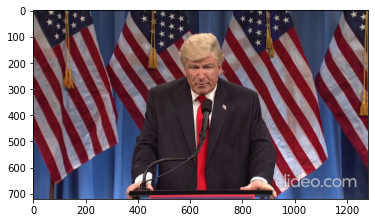

In [0]:
img_path = Path("workspace/data_dst/00001.png")
#img_bgr = np.zeros( (128,128,3), dtype=np.uint8)
img_bgr = cv2_imread(img_path)
print(img_bgr.shape)
imagelib.normalize_channels(img_bgr, 3)                    
#h,w,c = img_bgr.shape

aln_path = Path("workspace/data_dst/aligned_shot/00001_0.jpg")
#aln_bgr = np.zeros( (128,128,3), dtype=np.uint8)
aln_bgr = cv2_imread(aln_path)
print(aln_bgr.shape)
imagelib.normalize_channels(img_bgr, 3) 
dfl_aln = DFLIMG.load(aln_path)

plt.imshow(img_bgr[..., ::-1])

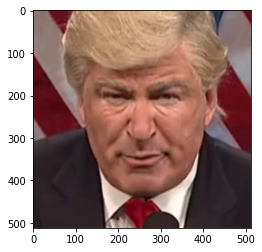

In [0]:
plt.imshow(aln_bgr[..., ::-1])

In [0]:
landmarks = dfl_aln.get_source_landmarks()
#print(landmarks)
mat = dfl_aln.get_image_to_face_mat()
print(mat)
face_mat = LandmarksProcessor.get_transform_mat (landmarks, 128, face_type=FaceType.FULL)
print(face_mat)

[[ 2.27500926e+00 -6.97344650e-02 -1.19140302e+03]
 [ 6.97344650e-02  2.27500926e+00 -3.41677309e+02]]
[[ 7.59242166e-01 -2.32727308e-02 -4.19043909e+02]
 [ 2.32725245e-02  7.59242166e-01 -1.41075528e+02]]


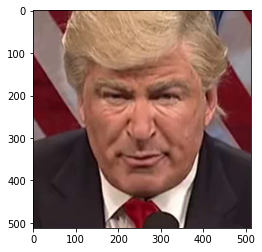

In [0]:
#flags=cv2.WARP_INVERSE_MAP | 
dst_face_bgr = cv2.warpAffine(img_bgr, mat, (512,512), flags=cv2.INTER_CUBIC)
plt.imshow(dst_face_bgr[..., ::-1])

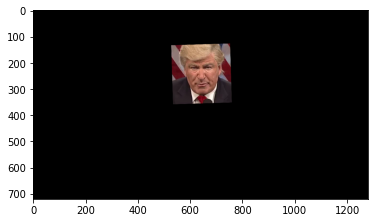

In [0]:
dst_bgr = cv2.warpAffine(dst_face_bgr, mat, (1280,720), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_CUBIC)
plt.imshow(dst_bgr[..., ::-1])

In [0]:
dst_face_bgr = cv2.warpAffine(img_bgr, id_mat, (512,512), flags=cv2.INTER_CUBIC)
plt.imshow(dst_face_bgr[..., ::-1])

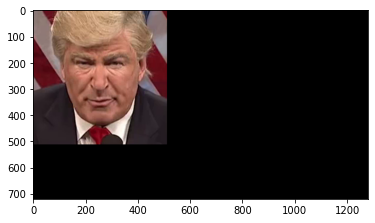

In [0]:
id_mat = np.identity((3))[:2]
dst_bgr = cv2.warpAffine(dst_face_bgr, id_mat, (1280,720), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_CUBIC)
plt.imshow(dst_bgr[..., ::-1])

In [0]:
#@title Sort aligned
Data = "data_src" #@param ["data_src", "data_dst"]
sort_type = "hist" #@param ["blur", "face-yaw", "face-pitch", "face-source-rect-size", "hist", "hist-dissim", "brightness", "hue", "black", "origname", "oneface", "final", "final-faster", "absdiff"]

cmd = "DeepFaceLab/main.py sort --input-dir workspace/"+Data+"/aligned --by "+sort_type

%cd "/content"
!python $cmd

In [0]:
#@title Faceset Enhancer
Data = "data_src" #@param ["data_src", "data_dst"]

data_path = "/content/workspace/"+Data+"/aligned"
cmd = "/content/DeepFaceLab/main.py facesettool enhance --input-dir "+data_path
!python $cmd

In [0]:
#@title Apply or remove XSeg mask to the faces
Mode = "Remove mask" #@param ["Apply mask", "Remove mask"]
Data = "data_src" #@param ["data_src", "data_dst"]

main_path = "/content/DeepFaceLab/main.py "
data_path = "/content/workspace/"+Data+"/aligned "
mode_arg = "apply " if Mode == "Apply mask" else "remove "
cmd = main_path+"xseg "+mode_arg+"--input-dir "+data_path
cmd += "--model-dir /content/workspace/model" if mode_arg == "apply " else ""

!python $cmd

In [0]:
%cd "/content/"

cmd = os.path.join(GDRIVE_PROJ, GIT_REPO, "main.py")
cmd += " util"

#cmd+= " --input-dir workspace/data_dst/aligned --dst-dir workspace/data_dst/"
  
!python $cmd

/content/drive/My Drive/Code/DFL
/content/drive/My Drive/Code/DFL/DeepFaceLab
usage: main.py util [-h] --input-dir INPUT_DIR [--add-landmarks-debug-images]
                    [--recover-original-aligned-filename]
                    [--save-faceset-metadata] [--restore-faceset-metadata]
                    [--pack-faceset] [--unpack-faceset] [--filter-faceset]
                    [--filter-radius] [--dst-dir]
main.py util: error: the following arguments are required: --input-dir


## Train model

* Choose your model type, but SAEHD is recommend for everyone
* Set model options on output field
* You can see preview manually, if go to model folder in filemanager and double click on preview.jpg file
* Your workspace will be archived and upload to mounted Drive after 11 hours from start session
* If you select "Backup_every_hour" option, your workspace will be backed up every hour.
* Also, you can export your workspace manually in "Manage workspace" block
* "Silent_Start" option provides to automatically start with best GPU and last used model. 

In [0]:
#@title Training
Model = "SAEHD" #@param ["SAEHD", "Quick96", "XSeg"]
Backup_every_hour = True #@param {type:"boolean"}
Silent_Start = True #@param {type:"boolean"}

%cd "/content"

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive')

import psutil, os, time

p = psutil.Process(os.getpid())
uptime = time.time() - p.create_time()

if (Backup_every_hour):
  if not os.path.exists('workspace.zip'):
    print("Creating workspace archive ...")
    !zip -r -q workspace.zip workspace
    print("Archive created!")
  else:
    print("Archive exist!")

if (Backup_every_hour):
  print("Time to end session: "+str(round((43200-uptime)/3600))+" hours")
  backup_time = str(3600)
  backup_cmd = " --execute-program -"+backup_time+" \"import os; os.system('zip -r -q workspace.zip workspace/model'); os.system('cp /content/workspace.zip /content/drive/My\ Drive/'); print('Backed up!') \"" 
elif (round(39600-uptime) > 0):
  print("Time to backup: "+str(round((39600-uptime)/3600))+" hours")
  backup_time = str(round(39600-uptime))
  backup_cmd = " --execute-program "+backup_time+" \"import os; os.system('zip -r -q workspace.zip workspace'); os.system('cp /content/workspace.zip /content/drive/My\ Drive/'); print('Backed up!') \"" 
else:
  print("Session expires in less than an hour.")
  backup_cmd = ""

#--pretraining-data-dir pretrain   
cmd = os.path.join(GDRIVE_PROJ, GIT_REPO, "main.py") 
cmd += " train --training-data-src-dir workspace/data_src/aligned --training-data-dst-dir workspace/data_dst/aligned --model-dir workspace/model/LIAE_pre --model SAEHD"

if Model == "Quick96":
  cmd+= " --pretrained-model-dir pretrain_Q96"

if Silent_Start:
  cmd+= " --silent-start"

if (backup_cmd != ""):
  train_cmd = (cmd+backup_cmd)
else:
  train_cmd = (cmd)

!python $train_cmd

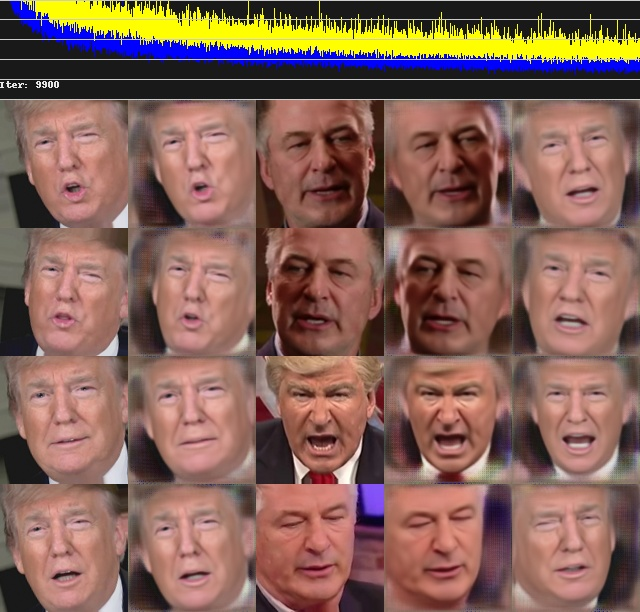

In [0]:
from IPython.display import Image
Image('workspace/model/LIAE_pre/new_SAEHD_preview_SAEHD.jpg')

## Merge frames

In [0]:
#@title Merge
Model = "SAEHD" #@param ["SAEHD", "Quick96" ]

cmd = os.path.join(GDRIVE_PROJ, GIT_REPO, "main.py")
cmd += " merge --input-dir workspace/data_dst --output-dir workspace/data_dst/merged --output-mask-dir workspace/data_dst/merged_mask --aligned-dir workspace/data_dst/aligned_shot --model-dir workspace/model/LIAE_pre --model "+Model

%cd "/content"
!python $cmd

/content
Running merger.

Choose one of saved models, or enter a name to create a new model.
[r] : rename
[d] : delete

[0] : new - latest
 : 
0
Loading new_SAEHD model...
2020-05-03 21:03:57.553104: E tensorflow/stream_executor/cuda/cuda_driver.cc:300] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Initializing models: 100% 4/4 [00:00<00:00,  4.36it/s]
=========== Model Summary ============
==                                  ==
==            Model name: new_SAEHD ==
==                                  ==
==     Current iteration: 8061      ==
==                                  ==
==--------- Model Options ----------==
==                                  ==
==            resolution: 128       ==
==             face_type: f         ==
==     models_opt_on_gpu: True      ==
==                 archi: liae      ==
==               ae_dims: 128       ==
==                e_dims: 80        ==
==                d_dims: 48        ==
==           d_mask_dims: 

In [0]:
#@title Get result video 
Mode = "result video" #@param ["result video", "result_mask video"]
Copy_to_Drive = True #@param {type:"boolean"}


if Mode == "result video":
  !python DeepFaceLab/main.py videoed video-from-sequence --input-dir workspace/data_dst/merged --output-file workspace/result.mp4 --reference-file workspace/data_dst.mp4 --include-audio
  if Copy_to_Drive:
    !cp /content/workspace/result.mp4 /content/drive/My\ Drive/
elif Mode == "result_mask video":
  !python DeepFaceLab/main.py videoed video-from-sequence --input-dir workspace/data_dst/merged_mask --output-file workspace/result_mask.mp4 --reference-file workspace/data_dst.mp4
  if Copy_to_Drive:
    !cp /content/workspace/result_mask.mp4 /content/drive/My\ Drive/
